In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(5)

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
articles_df = pd.read_csv('/content/drive/My Drive/result.csv')

print("Number of articles loaded: %s " % (len(articles_df)))
articles_df.dropna(subset = ["topic"], inplace=True)
articles_df

Number of articles loaded: 114 


,_id,topic,heading,summary,date_published,content,tags
0,5ef0d2b4d83b3587cb500ec9,"[""analysis""]","[""Don’t discriminate against non-resident migr...","[""Create a legal regime that allows them to ac...","[""Updated: Jun 22, 2020 19:30 IST""]","[""Prime Minister (PM) Narendra Modi recently a...","[""India"",""Narendra Modi"",""BIHAR"",""Haryana"",""Mi..."
2,5ef0d2b8d83b3587cb500ecb,"[""opinion""]","[""India has closed military gap with China alo...","[""Over the past dozen years India has not only...","[""Updated: Jun 22, 2020 16:01 IST""]","[""India has the "","", says a recent Harvard Uni...","[""Indian Army"",""Galwan Valley"",""India China bo..."
3,5ef0d2bad83b3587cb500ecc,"[""opinion""]","[""Ladakh faceoff: Looking back for a way forwa...","[""DRAW THE LINE Policing the borders and preve...","[""Updated: Jun 22, 2020 18:06 IST""]","[""On December 11, 1917, General Edmund Allenby...",NaN
4,5ef0d2bdd83b3587cb500ecd,"[""editorials""]","[""Redesign the model village scheme | HT Edito...","[""For MPs to take it up, expand its ambit to a...","[""Updated: Jun 22, 2020 18:56 IST""]","[""A study commissioned by the Union ministry o...",NaN
5,5ef0d2bed83b3587cb500ece,"[""columns""]","[""How China has overplayed its hand, writes Ba...","[""Beijing’s belligerence reflects a familiar h...","[""Updated: Jun 22, 2020 19:31 IST""]","[""Almost 2,500 years ago, Greek historian, Thu...","[""CHINA"",""India""]"
...,...,...,...,...,...,...,...
109,5efe0c6b5eecd3719d741c41,"[""other-sports""]","[""Govt to constitute National Compliance Platf...","[""The panel will have Indian Olympic Associati...","[""Updated: Jul 02, 2020 19:02 IST""]","[""The government is set to constitute a ‘Natio...","[""Doping in sport"",""Govt"",""UNESCO""]"
110,5efe0c6c5eecd3719d741c42,"[""cricket""]","[""WI head coach Phil Simmons rejoins team afte...","[""Simmons had found himself in a soup after bo...","[""Updated: Jul 02, 2020 19:26 IST""]","[""West Indies head coach Phil Simmons has rejo...","[""Phil Simmons"",""West Indies"",""England"",""Crick..."
111,5efe0c6f5eecd3719d741c43,"[""tennis""]","[""Up to 20,000 fans to be allowed to attend 20...","[""French federation president Bernard Giudicel...","[""Updated: Jul 02, 2020 19:50 IST""]","["" Up to 60% of the usual capacity will be all...","[""Roland Garros"",""Bernard Giudicelli""]"
112,5efe0c715eecd3719d741c44,"[""it-s-viral""]","[""Kanye West posts picture with Elon Musk, peo...","[""“When you go to your boy’s house and you’re ...","[""Updated: Jul 02, 2020 20:27 IST""]","[""Kanye West recently shared a photograph of h...","[""Elon musk"",""Kanye West"",""Twitter""]"


In [53]:
len(articles_df["topic"])

104

In [9]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import re

In [54]:
sent_tokenized = [sent for sent in nltk.sent_tokenize('["analysis"]')]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
word_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Remove tokens that do not contain any letters from words_tokenized

filtered = [word for word in word_tokenized if re.search('[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

['analysis']

In [55]:
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    word_tokenized = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in word_tokenized if re.search('[a-zA-Z]', token)]
    
    return filtered_tokens

words_stemmed = tokenize_and_stem('["analysis"]')
print(words_stemmed)

['analysis']


In [77]:
# ... YOUR CODE FOR TASK 6 ...
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words = 'english')

In [78]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in articles_df["topic"]])

print(tfidf_matrix.shape)

(104, 24)


In [79]:
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

In [81]:
#from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
#similarity_distance = 1 - cosine_similarity(tfidf_matrix)

for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 education
 world
 mumbai
 business
 editorials
 bollywood
 fashion-and-trends
 delhi
 columns
 cricket
Cluster 1:
 it-s-viral
 world
 fitness
 art-and-culture
 bollywood
 business
 columns
 cricket
 delhi
 editorials
Cluster 2:
 tv
 world
 art-and-culture
 bollywood
 business
 columns
 cricket
 delhi
 editorials
 education
Cluster 3:
 india
 world
 fitness
 art-and-culture
 bollywood
 business
 columns
 cricket
 delhi
 editorials
Cluster 4:
 analysis
 tv
 art-and-culture
 bollywood
 business
 columns
 cricket
 delhi
 editorials
 education


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


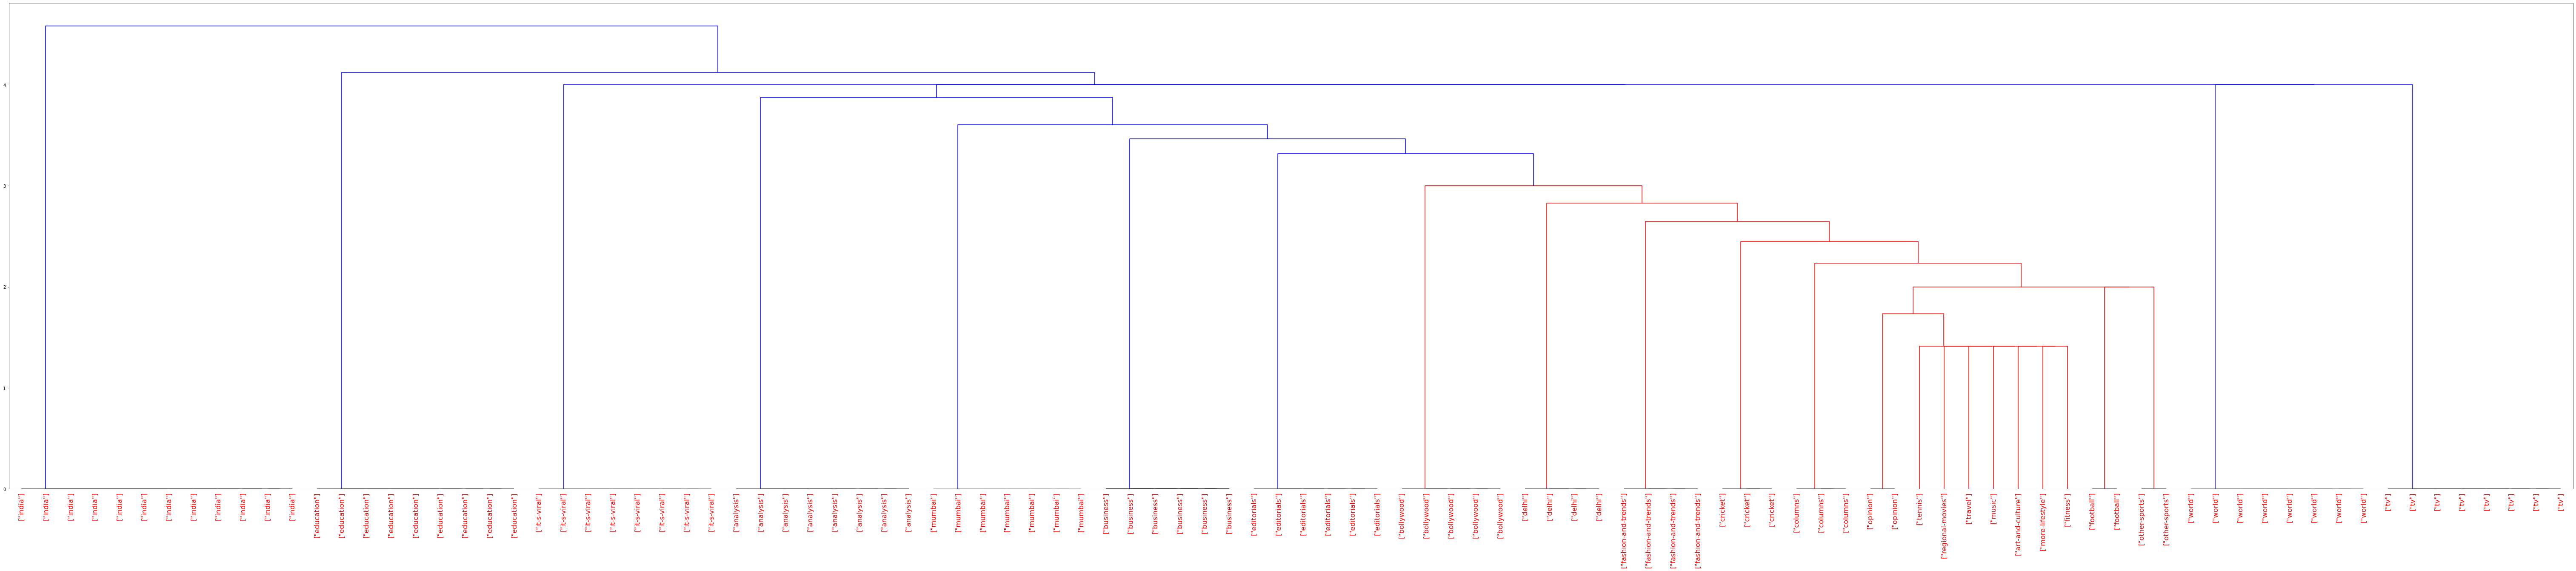

In [76]:
import matplotlib.pyplot as plt
# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
# ... YOUR CODE FOR TASK 10 ...

from scipy.cluster.hierarchy import linkage, dendrogram


# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in articles_df["topic"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()